<a href="https://colab.research.google.com/github/sai14karthik/DIP/blob/main/AP21110010310_DIP_8_ipynb8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# DIP Lab Assignment **8**
# N.Sai Karthik (AP21110010310) CSE-E



Write a program to improve contrast of an image
using histogram equalization. The prototype of the function is as below: histogram_equalisation(input_Image,
no_of_bins); The function should return the enhanced image. Consider two low
contrast input images. Study the nature of the output image quality in each
case by varying the number of bins.



In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


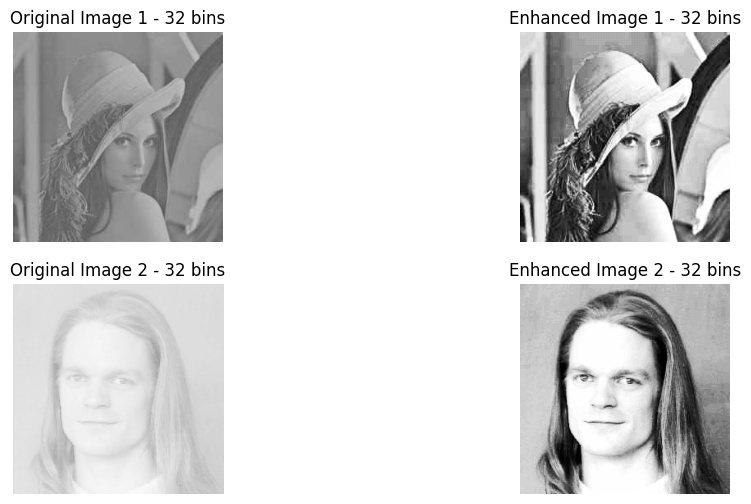

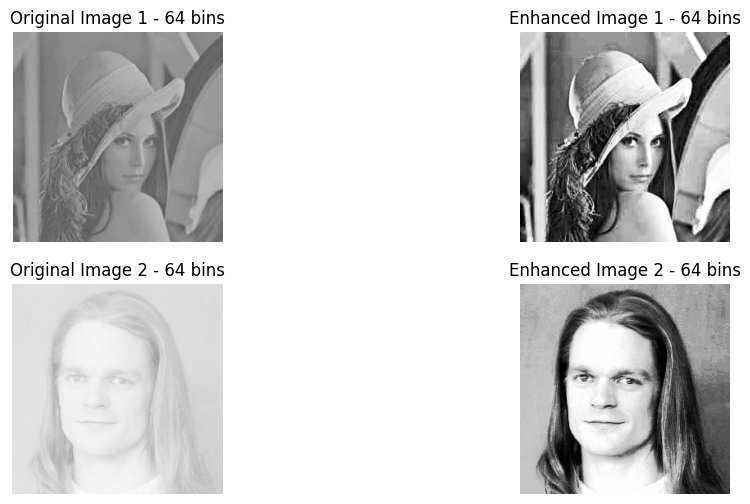

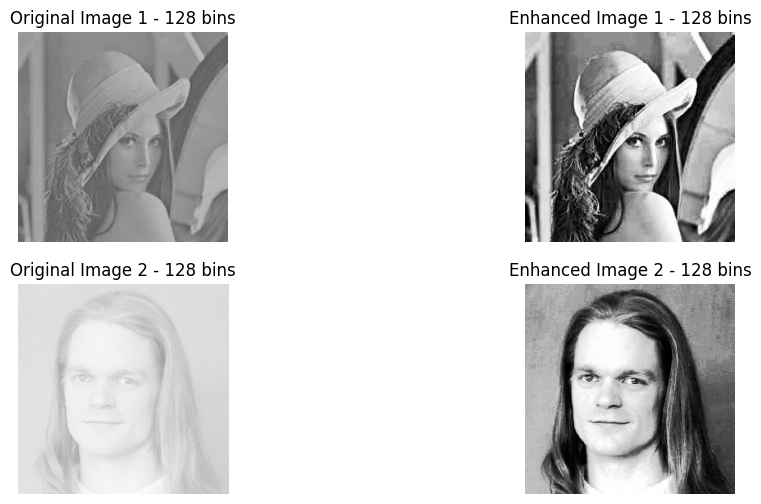

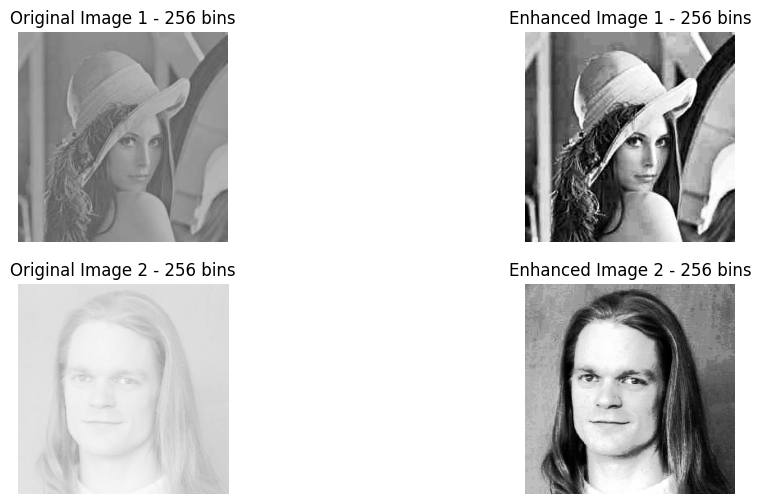

In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def histogram_equalisation(input_Image, no_of_bins):
    gray_image = cv2.cvtColor(input_Image, cv2.COLOR_BGR2GRAY)

    histogram, bin_edges = np.histogram(gray_image.flatten(), bins=no_of_bins, range=[0, 256])

    cdf = histogram.cumsum()
    cdf_normalized = cdf * float(histogram.max()) / cdf.max()

    cdf_min = cdf.min()
    cdf_max = cdf.max()
    cdf = (cdf - cdf_min) / (cdf_max - cdf_min) * 255

    equalized_image = np.interp(gray_image.flatten(), bin_edges[:-1], cdf)
    equalized_image = equalized_image.reshape(gray_image.shape).astype(np.uint8)

    return equalized_image


image1 = cv2.imread('/content/drive/MyDrive/DIP /a-low-contrast-image-b-after-enhancement.ppm.png')
image2 = cv2.imread('/content/drive/MyDrive/DIP /Example-of-low-contrast-images-and-corresponding-results-of-intensity-normalization-and.png')

bins_list = [32, 64, 128, 256]

for bins in bins_list:
    enhanced_image1 = histogram_equalisation(image1, bins)
    enhanced_image2 = histogram_equalisation(image2, bins)

    # Display the results
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plt.title(f'Original Image 1 - {bins} bins')
    plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 2, 2)
    plt.title(f'Enhanced Image 1 - {bins} bins')
    plt.imshow(enhanced_image1, cmap='gray')
    plt.axis('off')

    plt.subplot(2, 2, 3)
    plt.title(f'Original Image 2 - {bins} bins')
    plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(2, 2, 4)
    plt.title(f'Enhanced Image 2 - {bins} bins')
    plt.imshow(enhanced_image2, cmap='gray')
    plt.axis('off')

    plt.show()
